# Part-3

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
data_dir='./cnn_dataset'

In [4]:

    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)
    train_data = datagen.flow_from_directory(
        data_dir,
        target_size=(224, 224),
        batch_size=50,
        class_mode='categorical',
        subset='training',
        seed=7
    )
    valid_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='categorical',
    subset='validation',
    seed=7
    )

Found 21000 images belonging to 3 classes.
Found 9000 images belonging to 3 classes.


In [5]:
#Taking the first batch to plot some images
X_train, y_train = next(train_data)
X_test, y_test = next(valid_data)

In [6]:
X_train.shape

(50, 224, 224, 3)

In [7]:
y_train.shape

(50, 3)

/Users/sameershaik/miniconda3/envs/tensorflow/lib/python3.10/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


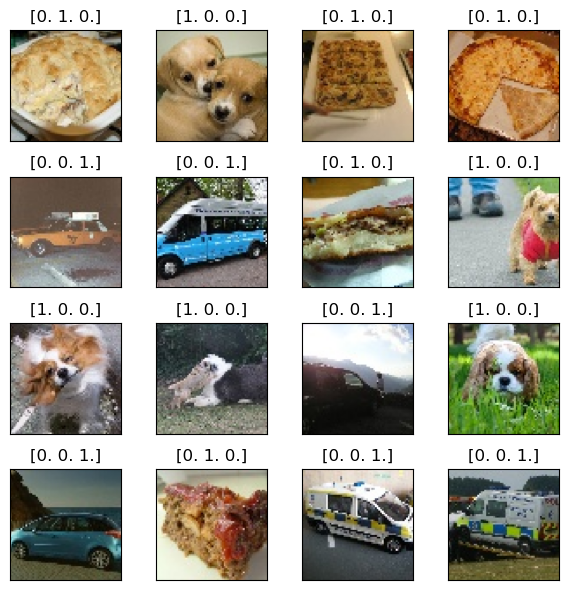

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(4, 4, figsize=(6,6))
for i, ax in enumerate(axs.flat):
    ax.imshow(X_train[i])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(y_train[i])
plt.tight_layout()
plt.show()

/Users/sameershaik/miniconda3/envs/tensorflow/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


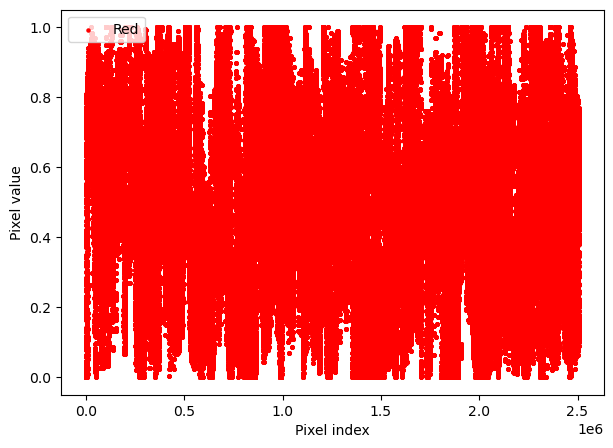

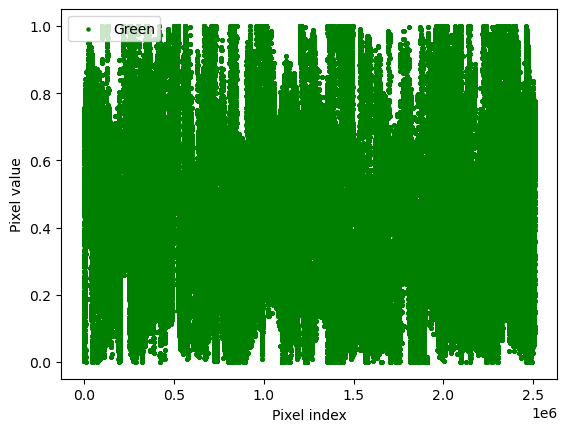

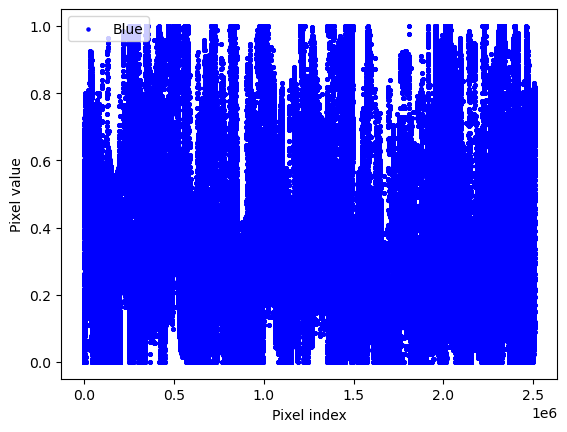

In [61]:
# Creating RGB Channel distribition scatter plot for 50 images
pixels = X_train.reshape(-1, 3)
plt.figure(figsize=(7,5))
# Separating the color channels into separate arrays
red_pixels = pixels[:, 0]
green_pixels = pixels[:, 1]
blue_pixels = pixels[:, 2]
# Creating a scatter plot of the red,blue and green channel
plt.scatter(range(len(red_pixels)), red_pixels, c='r', s=5, label='Red')
plt.xlabel('Pixel index')
plt.ylabel('Pixel value')
plt.legend()
plt.show()

plt.scatter(range(len(green_pixels)), green_pixels, c='g', s=5, label='Green')
plt.xlabel('Pixel index')
plt.ylabel('Pixel value')
plt.legend()
plt.show()

plt.scatter(range(len(blue_pixels)), blue_pixels, c='b', s=5, label='Blue')
plt.xlabel('Pixel index')
plt.ylabel('Pixel value')
plt.legend()
plt.show()

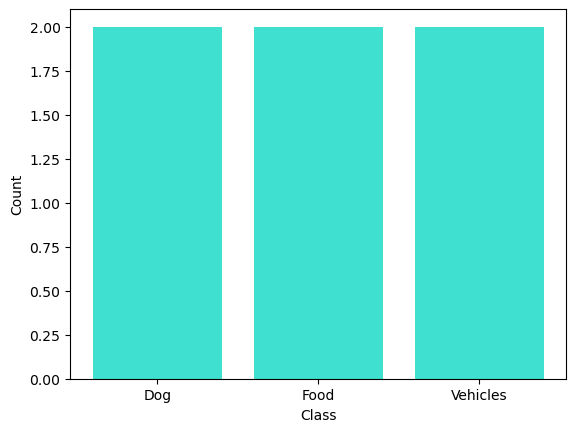

In [15]:
fig, ax = plt.subplots()
class_names = ['Dog','Food','Vehicles']
class_counts = np.bincount([np.argwhere(i == 1)[0][0] for i in train_data[1]])
ax.bar(np.arange(3), class_counts,color='turquoise')
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_xticks(np.arange(3))
ax.set_xticklabels(class_names)
plt.show()

In [8]:
#basic model

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,LeakyReLU,BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy,sparse_categorical_crossentropy
from keras.optimizers import SGD,Adadelta,Adagrad,RMSprop,Adam

In [9]:
def new_testing(alex_model,data):
    loss_metric = tf.keras.metrics.Mean(name='loss')
    acc_metric = tf.keras.metrics.CategoricalAccuracy(name='accuracy')
    for j in range(len(data)):
        X_test,y_test=next(data)
        logits2 = alex_model(X_test, training=False)
        loss_value2 = tf.keras.losses.categorical_crossentropy(y_test, logits2)
        loss_metric.update_state(loss_value2)
        acc_metric.update_state(y_test, logits2)

    loss = loss_metric.result()
    acc = acc_metric.result()

    return loss,acc

In [10]:
def new_train_alex(alex_model,train_data, valid_data, epochs,optimizer):
    vl,va=[],[]
    tl,ta=[],[]
    best_acc=0
    for epoch in range(epochs):
        print (f"{epoch+1} out of {epochs}")
        for i in range(420):
            X_train,y_train=next(train_data) 
            with tf.GradientTape() as tape:
                ypred = alex_model(X_train, training=True)
                loss_value = tf.keras.losses.categorical_crossentropy(y_train, ypred)
            gradients = tape.gradient(loss_value, alex_model.trainable_weights)
            optimizer.apply_gradients(zip(gradients, alex_model.trainable_weights))
        train_loss,train_acc=new_testing(alex_model,train_data)
        tl.append(train_loss)
        ta.append(train_acc)
        print ("Training loss: {:.4f}". format (float(train_loss)))
        print("Training accuracy: {:.4f}". format (float(train_acc)))
        
        val_loss,val_acc=new_testing(alex_model,valid_data)
        vl.append(val_loss)
        va.append(val_acc)
        if val_acc>best_acc:
            best_acc=val_acc
            alex_model.save('balex_model.h5')
        print ("Validation loss: {:.4f}". format (float(val_loss)))
        print("Validation accuracy: {:.4f}". format (float(val_acc)))
    return best_acc,vl,va,tl,ta

In [63]:
def BAlexnet():

    model = Sequential()
    model.add(Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), input_shape=(224, 224, 3), activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))


    model.add(Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))


    model.add(Conv2D(filters=384, kernel_size=(3, 3), padding='same', activation='relu'))
    
    model.add(Conv2D(filters=384, kernel_size=(3, 3), padding='same', activation='relu'))
    
    model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    model.add(Flatten())

    model.add(Dense(units=4096, activation='relu'))
    model.add(Dropout(rate=0.5))

    model.add(Dense(units=4096, activation='relu'))
    model.add(Dropout(rate=0.5))
    
    model.add(Dense(units=3, activation='softmax'))
    return model

In [64]:
alex_model=BAlexnet()
optimizer=Adam(learning_rate=0.0001, decay=1e-6)
best_acc,vl,va,tl,ta=new_train_alex(alex_model,train_data,valid_data,10,optimizer)

1 out of 10
Training loss: 0.3890
Training accuracy: 0.8448
Validation loss: 0.4294
Validation accuracy: 0.8313
2 out of 10
Training loss: 0.2628
Training accuracy: 0.9055
Validation loss: 0.3277
Validation accuracy: 0.8798
3 out of 10
Training loss: 0.2575
Training accuracy: 0.9026
Validation loss: 0.3113
Validation accuracy: 0.8824
4 out of 10
Training loss: 0.2909
Training accuracy: 0.8800
Validation loss: 0.3951
Validation accuracy: 0.8292
5 out of 10
Training loss: 0.1369
Training accuracy: 0.9508
Validation loss: 0.2632
Validation accuracy: 0.9047
6 out of 10
Training loss: 0.1271
Training accuracy: 0.9543
Validation loss: 0.2783
Validation accuracy: 0.8983
7 out of 10
Training loss: 0.0773
Training accuracy: 0.9738
Validation loss: 0.2632
Validation accuracy: 0.9107
8 out of 10
Training loss: 0.0950
Training accuracy: 0.9630
Validation loss: 0.3380
Validation accuracy: 0.8849
9 out of 10
Training loss: 0.0499
Training accuracy: 0.9831
Validation loss: 0.3057
Validation accuracy:

In [65]:
best_acc.numpy()

0.9115555

In [66]:
def plots(l1,l2,lab):
    fig, ax = plt.subplots()
    ax.plot(l1, label=f"Training {lab}")
    ax.plot(l2, label=f"Testing {lab}")
    
    ax.set_xlabel('Epochs')
    ax.set_ylabel(f"{lab}")
    
    ax.set_title(f'Training and Testing {lab}')
    ax.legend()
    plt.show()

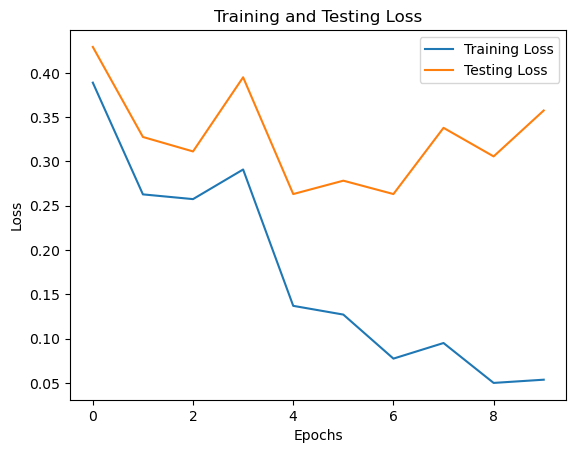

In [67]:
plots([i.numpy() for i in tl],[j.numpy() for j in vl],'Loss')

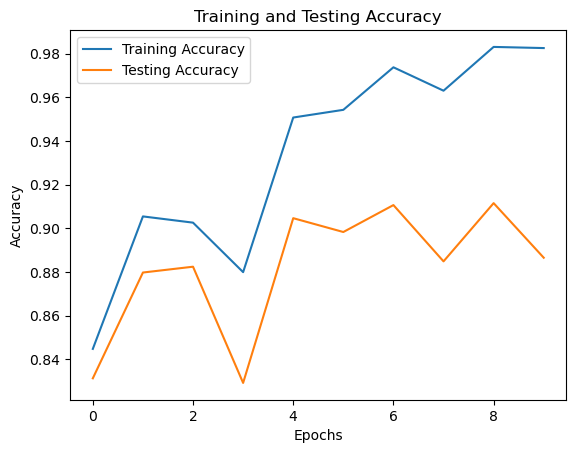

In [68]:
plots([i.numpy() for i in ta],[j.numpy() for j in va],'Accuracy')

In [187]:
def Alexnet1():

    model = Sequential()
    model.add(Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), input_shape=(224, 224, 3), activation='leaky_relu'))
    
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))


    model.add(Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='leaky_relu'))
    
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))


    model.add(Conv2D(filters=384, kernel_size=(3, 3), padding='same', activation='leaky_relu'))
    
    model.add(Conv2D(filters=384, kernel_size=(3, 3), padding='same', activation='leaky_relu'))
    
    model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='leaky_relu'))
    
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    model.add(Flatten())

    model.add(Dense(units=4096, activation='leaky_relu'))
    model.add(Dropout(rate=0.5))

    model.add(Dense(units=4096, activation='leaky_relu'))
    model.add(Dropout(rate=0.5))
    
    model.add(Dense(units=3, activation='softmax'))
    return model

In [116]:
#Using leaky_relu
alex_model1=Alexnet1()
optimizer=Adam(learning_rate=0.0001, decay=1e-6)
best_acc1,vl1,va1,tl1,ta1=new_train_alex(alex_model1,train_data,valid_data,10,optimizer)

1 out of 10
Training loss: 0.3130
Training accuracy: 0.8809
Validation loss: 0.3432
Validation accuracy: 0.8793
2 out of 10
Training loss: 0.2702
Training accuracy: 0.9008
Validation loss: 0.3140
Validation accuracy: 0.8791
3 out of 10
Training loss: 0.2415
Training accuracy: 0.9102
Validation loss: 0.3787
Validation accuracy: 0.8641
4 out of 10
Training loss: 0.1878
Training accuracy: 0.9273
Validation loss: 0.3144
Validation accuracy: 0.8920
5 out of 10
Training loss: 0.1328
Training accuracy: 0.9514
Validation loss: 0.2515
Validation accuracy: 0.9077
6 out of 10
Training loss: 0.0967
Training accuracy: 0.9647
Validation loss: 0.3611
Validation accuracy: 0.8822
7 out of 10
Training loss: 0.0778
Training accuracy: 0.9713
Validation loss: 0.3107
Validation accuracy: 0.8968
8 out of 10
Training loss: 0.0761
Training accuracy: 0.9729
Validation loss: 0.3223
Validation accuracy: 0.9002
9 out of 10
Training loss: 0.0500
Training accuracy: 0.9819
Validation loss: 0.3499
Validation accuracy:

In [118]:
best_acc1.numpy()

0.9076667

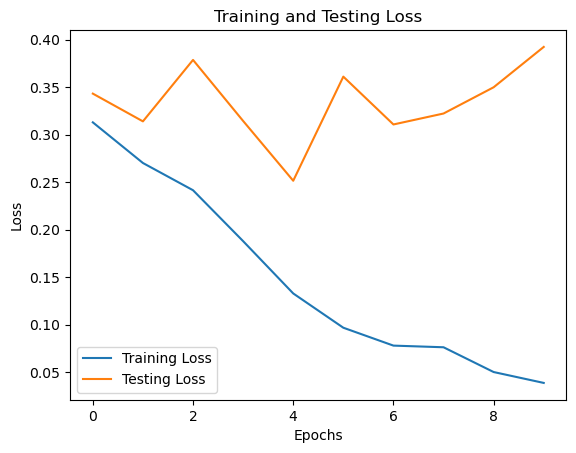

In [161]:
plots([i.numpy() for i in tl1],[j.numpy() for j in vl1],'Loss')

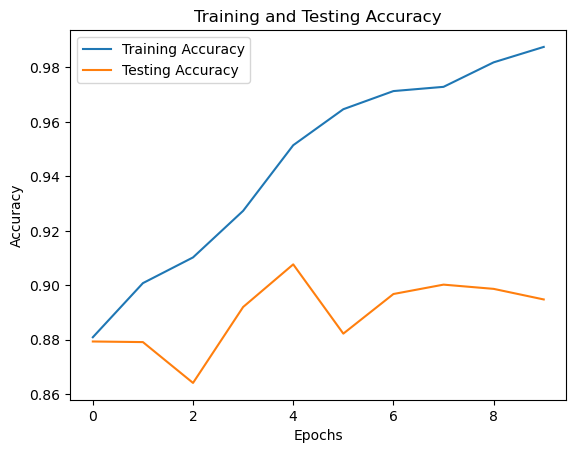

In [162]:
plots([i.numpy() for i in ta1],[j.numpy() for j in va1],'Accuracy')

In [124]:
alex_model2=Alexnet1()
optimizer=SGD(learning_rate=0.0001, momentum=0.9)
best_acc2,vl2,va2,tl2,ta2=new_train_alex(alex_model2,train_data,valid_data,10,optimizer)

1 out of 10
Training loss: 0.4322
Training accuracy: 0.8314
Validation loss: 0.4698
Validation accuracy: 0.8237
2 out of 10
Training loss: 0.3676
Training accuracy: 0.8542
Validation loss: 0.3938
Validation accuracy: 0.8480
3 out of 10
Training loss: 0.2842
Training accuracy: 0.8913
Validation loss: 0.3370
Validation accuracy: 0.8729
4 out of 10
Training loss: 0.2709
Training accuracy: 0.8992
Validation loss: 0.3587
Validation accuracy: 0.8730
5 out of 10
Training loss: 0.2110
Training accuracy: 0.9208
Validation loss: 0.2858
Validation accuracy: 0.8896
6 out of 10
Training loss: 0.2264
Training accuracy: 0.9167
Validation loss: 0.3595
Validation accuracy: 0.8711
7 out of 10
Training loss: 0.1368
Training accuracy: 0.9511
Validation loss: 0.2607
Validation accuracy: 0.9059
8 out of 10
Training loss: 0.1210
Training accuracy: 0.9536
Validation loss: 0.2809
Validation accuracy: 0.9053
9 out of 10
Training loss: 0.1467
Training accuracy: 0.9456
Validation loss: 0.3273
Validation accuracy:

In [ ]:
def BAlexnet1():

    model = Sequential()
    model.add(Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), input_shape=(224, 224, 3), activation='leaky_relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))


    model.add(Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='leaky_relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))


    model.add(Conv2D(filters=384, kernel_size=(3, 3), padding='same', activation='leaky_relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=384, kernel_size=(3, 3), padding='same', activation='leaky_relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='leaky_relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    model.add(Flatten())

    model.add(Dense(units=4096, activation='leaky_relu'))
    model.add(Dropout(rate=0.5))

    model.add(Dense(units=4096, activation='leaky_relu'))
    model.add(Dropout(rate=0.5))
    
    model.add(Dense(units=3, activation='softmax'))
    return model

In [153]:
alex_model1a=BAlexnet()
optimizer=Adam(learning_rate=0.0001, decay=1e-6)
best_acc4,vl4,va4,tl4,ta4=new_train_alex(alex_model1a,train_data,valid_data,15,optimizer)

1 out of 15
Training loss: 0.4085
Training accuracy: 0.8409
Validation loss: 0.4299
Validation accuracy: 0.8386
2 out of 15
Training loss: 0.3257
Training accuracy: 0.8854
Validation loss: 0.4007
Validation accuracy: 0.8552
3 out of 15
Training loss: 0.2442
Training accuracy: 0.9069
Validation loss: 0.3024
Validation accuracy: 0.8854
4 out of 15
Training loss: 0.1865
Training accuracy: 0.9328
Validation loss: 0.2840
Validation accuracy: 0.8963
5 out of 15
Training loss: 0.1835
Training accuracy: 0.9359
Validation loss: 0.3245
Validation accuracy: 0.8880
6 out of 15
Training loss: 0.1104
Training accuracy: 0.9624
Validation loss: 0.2839
Validation accuracy: 0.9057
7 out of 15
Training loss: 0.1094
Training accuracy: 0.9632
Validation loss: 0.2561
Validation accuracy: 0.9099
8 out of 15
Training loss: 0.0721
Training accuracy: 0.9744
Validation loss: 0.2929
Validation accuracy: 0.9099
9 out of 15
Training loss: 0.0567
Training accuracy: 0.9804
Validation loss: 0.2856
Validation accuracy:

In [154]:
best_acc4.numpy()

0.91022223

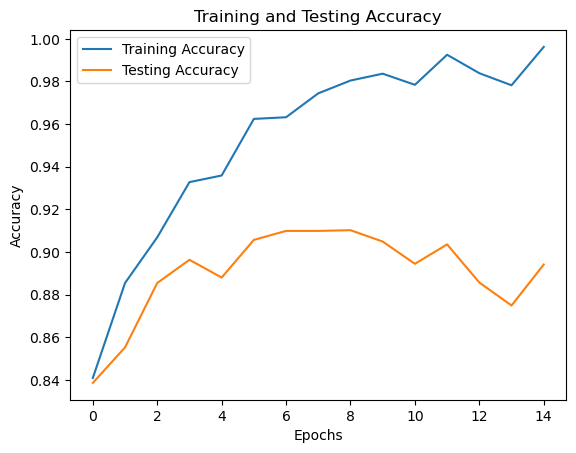

In [163]:
plots([i.numpy() for i in ta4],[j.numpy() for j in va4],'Accuracy')

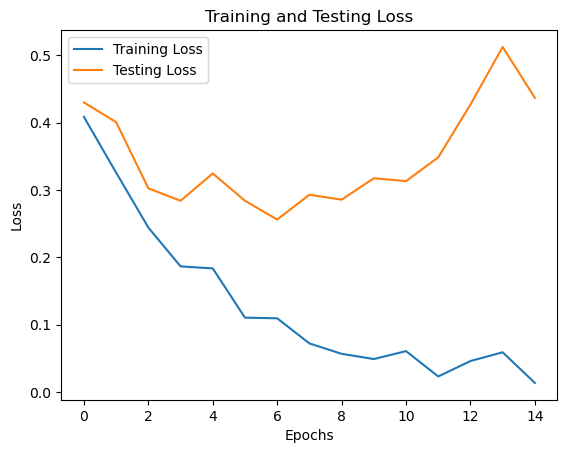

In [164]:
plots([i.numpy() for i in tl4],[j.numpy() for j in vl4],'Loss')

In [181]:
import copy
def es_train_alex(alex_model,train_data, valid_data, epochs,optimizer):
    vl,va=[],[]
    tl,ta=[],[]
    best_acc=0
    patience=2
    for epoch in range(epochs):
        print (f"{epoch+1} out of {epochs}")
        for i in range(420):
            X_train,y_train=next(train_data) 
            with tf.GradientTape() as tape:
                ypred = alex_model(X_train, training=True)
                loss_value = tf.keras.losses.categorical_crossentropy(y_train, ypred)

            gradients = tape.gradient(loss_value, alex_model.trainable_weights)
            optimizer.apply_gradients(zip(gradients, alex_model.trainable_weights))
            #batch_acc = tf.reduce_mean(tf.keras.metrics.categorical_accuracy(y_train,ypred))
        train_loss,train_acc=new_testing(alex_model,train_data)
        tl.append(train_loss)
        ta.append(train_acc)
        print ("Training loss: {:.4f}". format (float(train_loss)))
        print("Training accuracy: {:.4f}". format (float(train_acc)))
        
        val_loss,val_acc=new_testing(alex_model,valid_data)
        vl.append(val_loss)
        va.append(val_acc)
        print ("Validation loss: {:.4f}". format (float(val_loss)))
        print("Validation accuracy: {:.4f}". format (float(val_acc)))
        print('patience:', patience)
        if epoch>1:
            if vl[epoch]>vl[epoch-1]:
                patience-=1
            else:
                patience=2
            if patience==0:
                break
        
        if val_acc>best_acc:
            best_acc=val_acc
            alex_model.save('balex_model.h5')
    return best_acc,vl,va,tl,ta

In [182]:
alex_model1b=BAlexnet()
optimizer=Adam(learning_rate=0.00005, decay=1e-6)
best_acc5,vl5,va5,tl5,ta5=es_train_alex(alex_model1b,train_data,valid_data,15,optimizer)

1 out of 15
Training loss: 0.4547
Training accuracy: 0.8263
Validation loss: 0.4586
Validation accuracy: 0.8294
patience: 2
2 out of 15
Training loss: 0.3268
Training accuracy: 0.8736
Validation loss: 0.3600
Validation accuracy: 0.8687
patience: 2
3 out of 15
Training loss: 0.2991
Training accuracy: 0.8820
Validation loss: 0.3813
Validation accuracy: 0.8521
patience: 2
4 out of 15
Training loss: 0.2350
Training accuracy: 0.9081
Validation loss: 0.3005
Validation accuracy: 0.8861
patience: 1
5 out of 15
Training loss: 0.1870
Training accuracy: 0.9307
Validation loss: 0.3081
Validation accuracy: 0.8912
patience: 2
6 out of 15
Training loss: 0.1631
Training accuracy: 0.9396
Validation loss: 0.2784
Validation accuracy: 0.9011
patience: 1
7 out of 15
Training loss: 0.1433
Training accuracy: 0.9474
Validation loss: 0.3111
Validation accuracy: 0.8952
patience: 2
8 out of 15
Training loss: 0.0895
Training accuracy: 0.9694
Validation loss: 0.2577
Validation accuracy: 0.9114
patience: 1
9 out of

In [183]:
best_acc5.numpy()

0.912

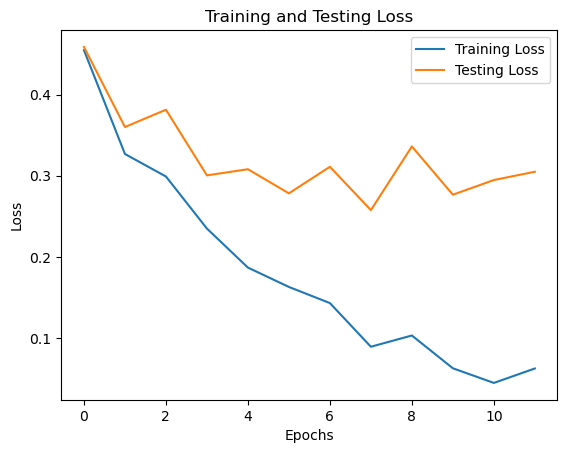

In [184]:
plots([i.numpy() for i in tl5],[j.numpy() for j in vl5],'Loss')

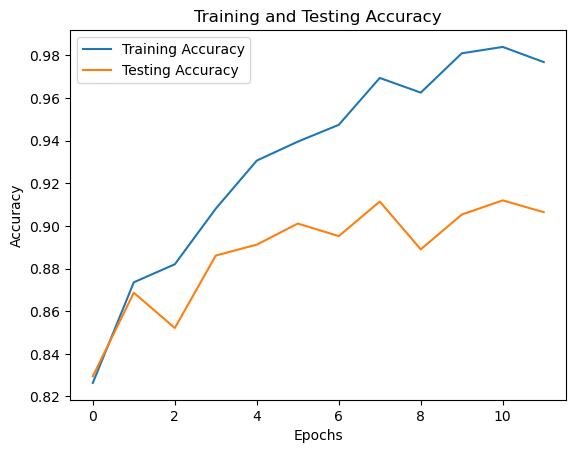

In [185]:
plots([i.numpy() for i in ta5],[j.numpy() for j in va5],'Accuracy')

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator



# Part - 4

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [3]:
#loading the dataset from local storage
raw_train_data = loadmat('svhn/train/train_32x32.mat')
raw_test_data = loadmat('svhn/test/test_32x32.mat')

In [4]:
# Dividing the data into train and test data and their repective labels
train_images = np.array(raw_train_data['X'])
train_labels = raw_train_data['y']

test_images = np.array(raw_test_data['X'])
test_labels = raw_test_data['y']

In [5]:
print(train_images.shape)
print(test_images.shape)

(32, 32, 3, 73257)
(32, 32, 3, 26032)


In [6]:
#Moving the axis
train_images = np.moveaxis(train_images, -1, 0)
test_images = np.moveaxis(test_images, -1, 0)

In [7]:
print(train_images.shape)
print(test_images.shape)

(73257, 32, 32, 3)
(26032, 32, 32, 3)


In [8]:
len(train_images)

73257

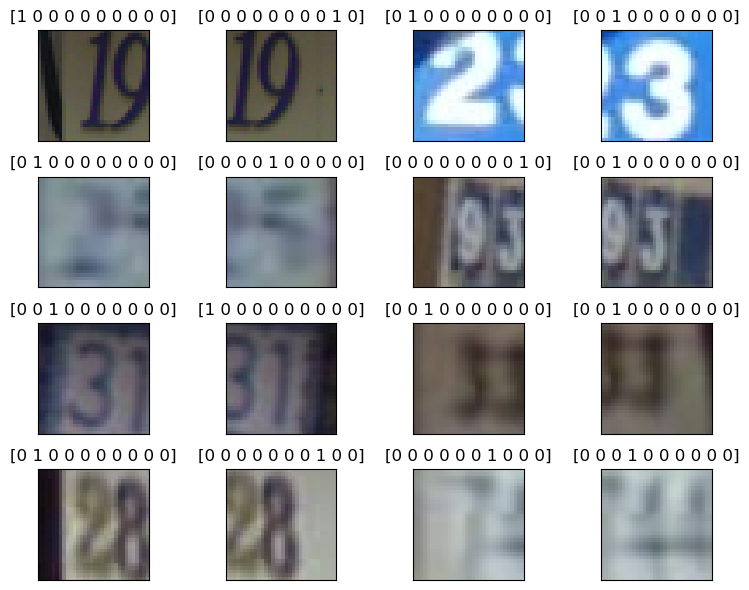

In [42]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(4, 4, figsize=(8,6))
for i, ax in enumerate(axs.flat):
    ax.imshow(train_images[i])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(train_labels[i])
plt.tight_layout()
plt.show()

In [50]:
type(X_train)

numpy.ndarray

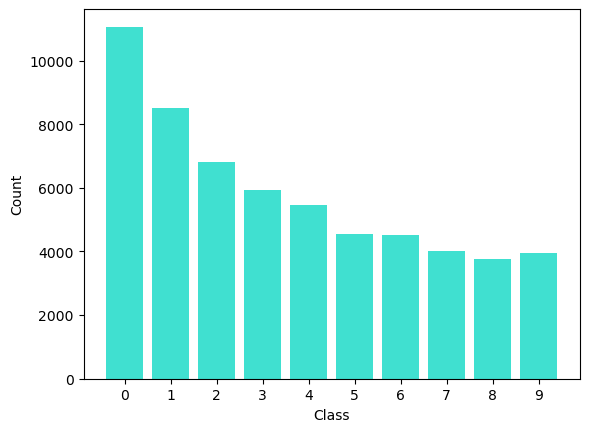

In [66]:
fig, ax = plt.subplots()
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
class_counts = np.bincount([np.argwhere(i == 1)[0][0] for i in y_train])
ax.bar(np.arange(10), class_counts,color='turquoise')
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_xticks(np.arange(10))
ax.set_xticklabels(class_names)
plt.show()

In [70]:
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.6/32.6 MB 53.6 MB/s eta 0:00:0000:0100:01


In [87]:
len(train_images)

73257

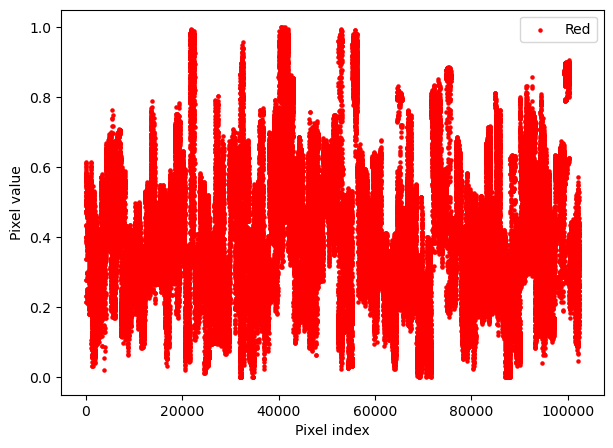

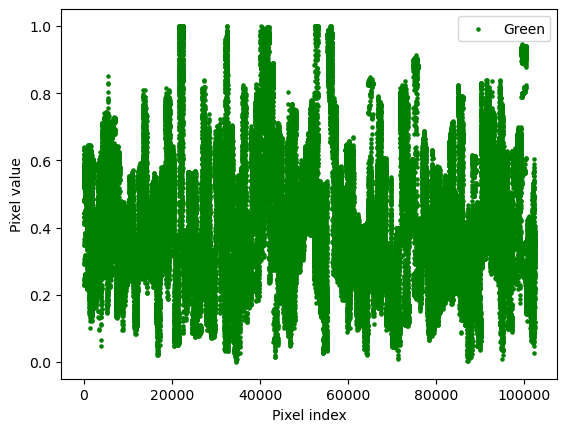

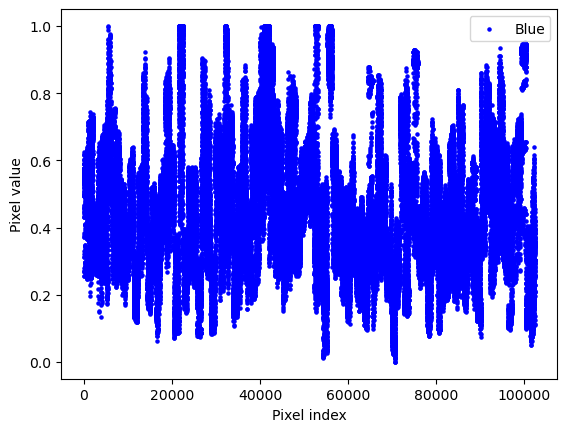

In [92]:
# Creating RGB Channel distribition scatter plot for random 100 images
ind=np.random.randint(0,len(train_images),100)
pixels = train_images[ind].reshape(-1, 3)
plt.figure(figsize=(7,5))
# Separating the color channels into separate arrays
red_pixels = pixels[:, 0]
green_pixels = pixels[:, 1]
blue_pixels = pixels[:, 2]
# Creating a scatter plot of the red,blue and green channel
plt.scatter(range(len(red_pixels)), red_pixels, c='r', s=5, label='Red')
plt.xlabel('Pixel index')
plt.ylabel('Pixel value')
plt.legend()
plt.show()

plt.scatter(range(len(green_pixels)), green_pixels, c='g', s=5, label='Green')
plt.xlabel('Pixel index')
plt.ylabel('Pixel value')
plt.legend()
plt.show()

plt.scatter(range(len(blue_pixels)), blue_pixels, c='b', s=5, label='Blue')
plt.xlabel('Pixel index')
plt.ylabel('Pixel value')
plt.legend()
plt.show()


In [10]:
train_images = train_images.astype('float64')
# Since label is integer
train_labels = train_labels.astype('int64')

In [11]:
test_images = test_images.astype('float64')
# Since label is integer
test_labels = test_labels.astype('int64')

In [12]:
#Rescaling
train_images /= 255.0
test_images /= 255.0

In [13]:
#Encoding the labels of train and test data
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb.fit(train_labels)
train_labels = lb.transform(train_labels)
test_labels = lb.transform(test_labels)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels,
                                                  test_size=0.2, random_state=13)

In [15]:
X_train.shape

(58605, 32, 32, 3)

In [16]:
X_val.shape

(14652, 32, 32, 3)

In [17]:
#Preprocessing Data
#randomly rotating them.
#zooming them in and out
#shifting them up and down.

In [18]:
from keras.preprocessing.image import ImageDataGenerator

In [19]:
# Image generator for data augumentation
datagen = ImageDataGenerator(rotation_range=8,
                             zoom_range=[0.95, 1.05],
                             height_shift_range=0.10,
                             shear_range=0.15)

In [20]:
datagen2=ImageDataGenerator()
valid_generator=datagen2.flow(X_val, y_val, batch_size=50)

In [21]:
datagen3=ImageDataGenerator()
train_generator=datagen3.flow(X_train, y_train, batch_size=50)

In [22]:
from tensorflow.python.client import device_lib

# Prints list of available devices, including GPUs
print(device_lib.list_local_devices())

Metal device set to: Apple M1
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12720126044656191699
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
locality {
  bus_id: 1
}
incarnation: 14020591964265259135
physical_device_desc: "device: 0, name: METAL, pci bus id: <undefined>"
xla_global_id: -1
]


In [23]:
import tensorflow as tf

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,LeakyReLU,BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy,sparse_categorical_crossentropy
from keras.optimizers import SGD,Adadelta,Adagrad,RMSprop,Adam

In [30]:
def basic_alexnet():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.3)) 
    
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same',activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.3))
    
    
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same',activation='relu'))
    model.add(BatchNormalization())         
    model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same',activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.3))


    model.add(Flatten())

    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(rate=0.4))
    model.add(Dense(units=10, activation='softmax'))
              
    return model
    

In [26]:
def new_testing(alex_model,data):
    loss_metric = tf.keras.metrics.Mean(name='loss')
    acc_metric = tf.keras.metrics.CategoricalAccuracy(name='accuracy')
    for j in range(len(data)):
        X_test,y_test=next(data)
        logits2 = alex_model(X_test, training=False)
        loss_value2 = tf.keras.losses.categorical_crossentropy(y_test, logits2)
        loss_metric.update_state(loss_value2)
        acc_metric.update_state(y_test, logits2)

    loss = loss_metric.result()
    acc = acc_metric.result()

    return loss,acc

In [27]:
def augumentation(X_t,y_t):
    datagen.fit(X_t)
    aug_generator = datagen.flow(X_t, y_t, batch_size=50)
    augmented_data = []
    augmented_labels = []
    batch = next(aug_generator)
    augmented_data.append(batch[0])
    augmented_labels.append(batch[1])

    augmented_data = np.concatenate(augmented_data)
    augmented_labels = np.concatenate(augmented_labels)

    x_train_combined = np.concatenate([X_t, augmented_data])
    y_train_combined = np.concatenate([y_t, augmented_labels])
    
    return x_train_combined,y_train_combined

In [94]:
def new_train_alex(alex_model,optimizer,epochs):
    vl,va=[],[]
    tl,ta=[],[]
    best_acc=0
    for epoch in range(epochs):
        print("{0} out of {1}".format(epoch+1, epochs))
        for i in range(0,X_train.shape[0],50):
            batch_x, batch_y =next(train_generator)
            aug_Xtrain,aug_ytrain=augumentation(batch_x, batch_y)
            with tf.GradientTape() as tape:
                ypred = alex_model(aug_Xtrain, training=True)
                loss_value = tf.keras.losses.categorical_crossentropy(aug_ytrain, ypred)

            gradients = tape.gradient(loss_value, alex_model.trainable_weights)
            optimizer.apply_gradients(zip(gradients, alex_model.trainable_weights))
        train_loss,train_acc=new_testing(alex_model,train_generator)
        tl.append(train_loss)
        ta.append(train_acc)
        print ("Training loss: {:.4f}". format (float(train_loss)))
        print("Training accuracy: {:.4f}". format (float(train_acc)))
        
        val_loss,val_acc=new_testing(alex_model,valid_generator)
        vl.append(val_loss)
        va.append(val_acc)
        if val_acc>best_acc:
            best_acc=val_acc
            alex_model.save('alex_modelsvhn.h5')
        print ("Validation loss: {:.4f}". format (float(val_loss)))
        print("Validation accuracy: {:.4f}". format (float(val_acc)))
    return best_acc,vl,va,tl,ta

In [31]:
alex_model1=basic_alexnet()
optimizer=Adam(learning_rate=0.001, decay=1e-6)
best_acc1,vl1,va1,tl1,ta1=new_train_alex(alex_model1,optimizer,10)

1 out of 10
Training loss: 0.4042
Training accuracy: 0.8795
Validation loss: 0.4228
Validation accuracy: 0.8742
2 out of 10
Training loss: 0.3042
Training accuracy: 0.9098
Validation loss: 0.3332
Validation accuracy: 0.9013
3 out of 10
Training loss: 0.2378
Training accuracy: 0.9317
Validation loss: 0.2849
Validation accuracy: 0.9204
4 out of 10
Training loss: 0.2031
Training accuracy: 0.9433
Validation loss: 0.2616
Validation accuracy: 0.9276
5 out of 10
Training loss: 0.2273
Training accuracy: 0.9326
Validation loss: 0.2903
Validation accuracy: 0.9154
6 out of 10
Training loss: 0.1888
Training accuracy: 0.9459
Validation loss: 0.2632
Validation accuracy: 0.9248
7 out of 10
Training loss: 0.1879
Training accuracy: 0.9461
Validation loss: 0.2708
Validation accuracy: 0.9225
8 out of 10
Training loss: 0.1506
Training accuracy: 0.9586
Validation loss: 0.2473
Validation accuracy: 0.9323
9 out of 10
Training loss: 0.1412
Training accuracy: 0.9605
Validation loss: 0.2420
Validation accuracy:

In [37]:
best_acc1.numpy()

0.93475294

In [32]:
datagen4=ImageDataGenerator()
test_generator=datagen3.flow(test_images, test_labels, batch_size=50)

In [33]:
test_loss,test_acc=new_testing(alex_model1,test_generator)

In [34]:
test_loss.numpy()

0.22944371

In [35]:
test_acc.numpy()

0.937961

In [89]:
def plots(l1,l2,lab):
    fig, ax = plt.subplots()
    ax.plot(l1, label=f"Training {lab}")
    ax.plot(l2, label=f"Testing {lab}")
    
    ax.set_xlabel('Epochs')
    ax.set_ylabel(f"{lab}")
    
    ax.set_title(f'Training and Testing {lab}')
    ax.legend()
    plt.show()

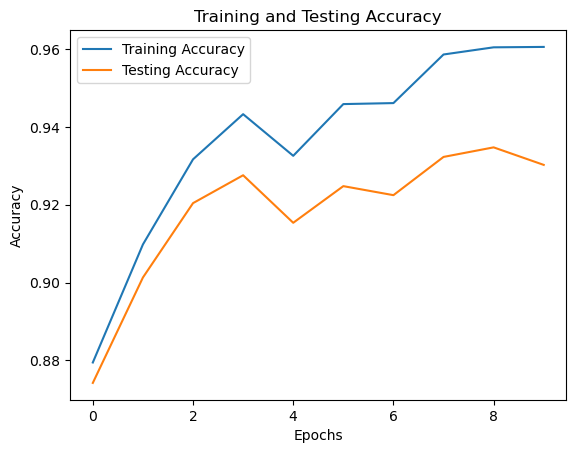

In [90]:
plots([i.numpy() for i in ta1],[j.numpy() for j in va1],'Accuracy')

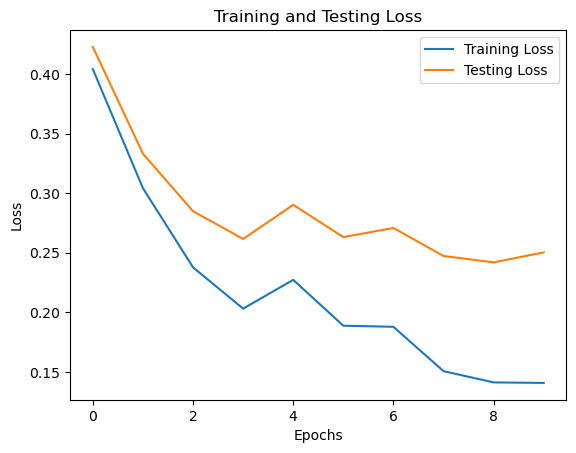

In [91]:
plots([i.numpy() for i in tl1],[j.numpy() for j in vl1],'Loss')

In [104]:
alex_model2=basic_alexnet()
optimizer=SGD(learning_rate=0.0001)
best_acc2,vl2,va2,tl2,ta2=new_train_alex(alex_model2,optimizer,10)

1 out of 10
Training loss: 1.1959
Training accuracy: 0.6078
Validation loss: 1.1945
Validation accuracy: 0.6091
2 out of 10
Training loss: 0.5592
Training accuracy: 0.8247
Validation loss: 0.5715
Validation accuracy: 0.8208
3 out of 10
Training loss: 0.4523
Training accuracy: 0.8596
Validation loss: 0.4702
Validation accuracy: 0.8535
4 out of 10
Training loss: 0.3568
Training accuracy: 0.8915
Validation loss: 0.3820
Validation accuracy: 0.8881
5 out of 10
Training loss: 0.3414
Training accuracy: 0.8972
Validation loss: 0.3602
Validation accuracy: 0.8918
6 out of 10
Training loss: 0.3460
Training accuracy: 0.8939
Validation loss: 0.3795
Validation accuracy: 0.8855
7 out of 10
Training loss: 0.3387
Training accuracy: 0.8956
Validation loss: 0.3837
Validation accuracy: 0.8823
8 out of 10
Training loss: 0.2687
Training accuracy: 0.9201
Validation loss: 0.3012
Validation accuracy: 0.9083
9 out of 10
Training loss: 0.2435
Training accuracy: 0.9275
Validation loss: 0.2920
Validation accuracy:

In [106]:
best_acc2.numpy()

0.91659844

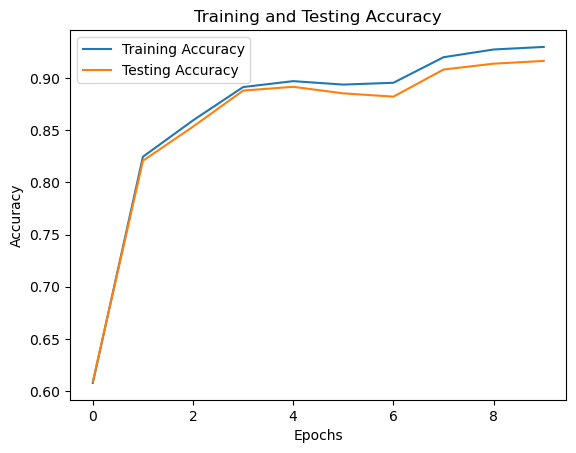

In [107]:
plots([i.numpy() for i in ta2],[j.numpy() for j in va2],'Accuracy')

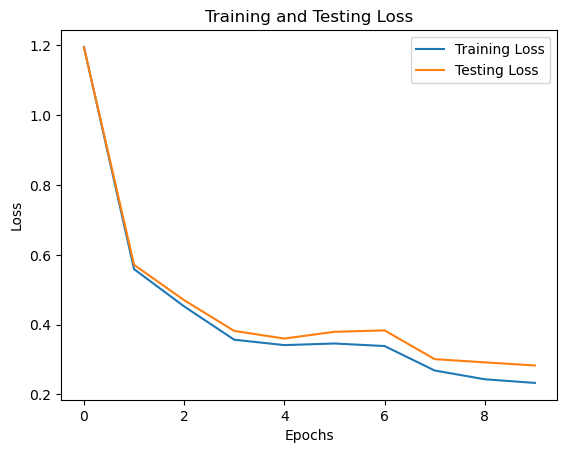

In [108]:
plots([i.numpy() for i in tl2],[j.numpy() for j in vl2],'Loss')

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
http://ufldl.stanford.edu/housenumbers/
https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html